Analysis and forecasting of Stock prices
==============

This repository contains an analysis of aluminum stock prices, using monthly data from the London Metal Exchange (LME) spanning 1990 to 2022. I aim to explore machine learning forecasting techniques to predict the trends of aluminum prices—a commodity central to industries such as automotive, construction, and electronics, known for its significant price volatility.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime

## Data preparation

### Collecting data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("valeurs_mensuelles.csv", delimiter = ';')
df.head()

,Libellé,idBank,Dernière mise à jour,Période,1990-01,1990-02,1990-03,1990-04,1990-05,1990-06,...,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05
0,Acier merchant bar - Indice en euros - Base 20...,1743680.0,31/10/2017 08:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Codes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fioul lourd (Rotterdam) - CAF + Taxe Intérieur...,1711382.0,31/10/2017 08:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Codes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cours des matières premières importées - Huile...,10002056.0,20/11/2018 10:44,NaN,545.8,564.7,573.7,565.7,577.1,568.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data extraction and preprocessing

From this header view, I can see this dataset has quite a lot of missing values. I will extract the Aluminium data and analyze it.

In [4]:
data = df[df['Libellé'].str.contains("Aluminium", case=False, na=False)]
data

,Libellé,idBank,Dernière mise à jour,Période,1990-01,1990-02,1990-03,1990-04,1990-05,1990-06,...,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05
44,Cours des matières premières importées - Alumi...,10002041.0,17/06/2022 12:00,NaN,1533.0,1454.7,1567.9,1521.4,1527.4,1566.3,...,2610.6,2839.2,2954.5,2640.7,2694.4,3002.2,3259.7,3536.7,3255.6,2825.5
224,Aluminium - Haut grade - Au comptant - LME - I...,10002093.0,17/06/2022 12:00,NaN,81.2,76.0,83.4,79.9,79.0,81.6,...,141.7,154.1,162.7,147.8,152.3,169.5,183.6,205.1,192.2,170.6


There is a euros and a dollars version for Aluminium. We pick dollars.

In [5]:
data = data[data['Libellé'].str.contains("dollars", case=False, na=False)]
data

,Libellé,idBank,Dernière mise à jour,Période,1990-01,1990-02,1990-03,1990-04,1990-05,1990-06,...,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05
44,Cours des matières premières importées - Alumi...,10002041.0,17/06/2022 12:00,NaN,1533.0,1454.7,1567.9,1521.4,1527.4,1566.3,...,2610.6,2839.2,2954.5,2640.7,2694.4,3002.2,3259.7,3536.7,3255.6,2825.5


We only need the one variable data depicting the evolution of price for the time series analysis. Thus we can drop useless columns.

In [6]:
data.drop(columns=['Libellé', 'idBank', 'Dernière mise à jour', 'Période'], inplace=True)

<ipython-input-6-6f116f9baf46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Libellé', 'idBank', 'Dernière mise à jour', 'Période'], inplace=True)


We can now cleanse and preprocess the data. First, checking for missing values

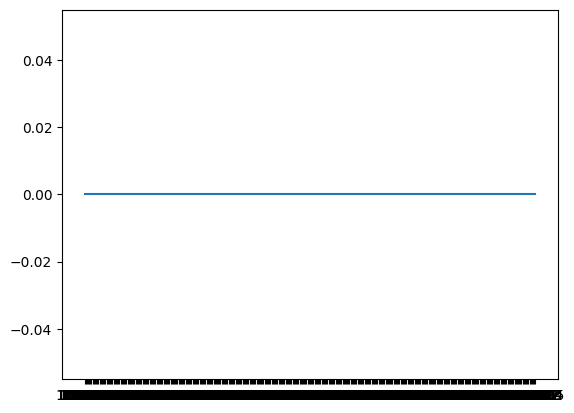

In [7]:
plt.plot(data.isnull().sum())

In [8]:
from pandas.core.tools.datetimes import to_datetime

data.columns = to_datetime(data.columns)
data.index = [0]
d = {'stock prices Al (LME)': data.values[0]}
ts = pd.DataFrame(data=d, index=data.columns)
ts['stock prices Al (LME)'] = pd.to_numeric(ts['stock prices Al (LME)'])
ts.head()

,stock prices Al (LME)
1990-01-01,1533.0
1990-02-01,1454.7
1990-03-01,1567.9
1990-04-01,1521.4
1990-05-01,1527.4


### Univariate analysis of the time series

length of time series : 389 



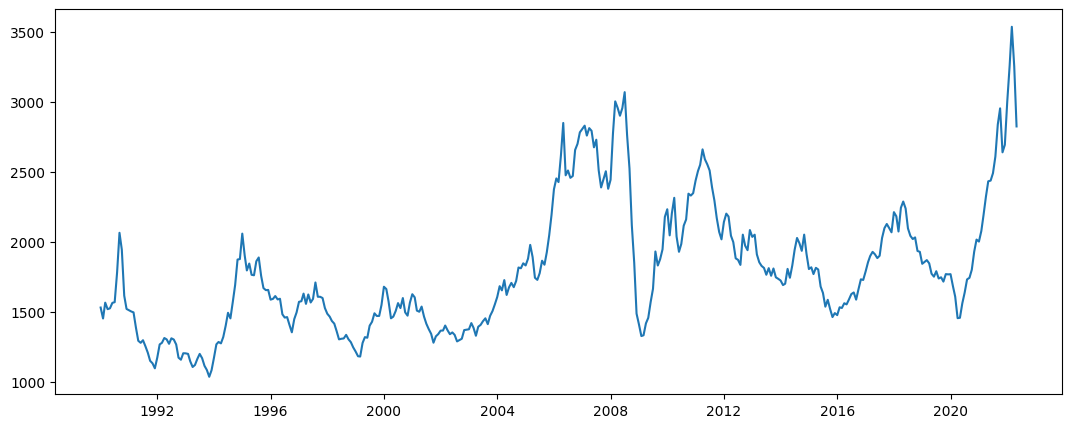

In [9]:
plt.figure(figsize=(13,5))
plt.plot(ts)
print('length of time series :', len(ts), "\n")

       stock prices Al (LME)
count             389.000000
mean             1795.296658
std               461.698932
min              1038.900000
25%              1461.500000
50%              1718.100000
75%              2033.500000
max              3536.700000


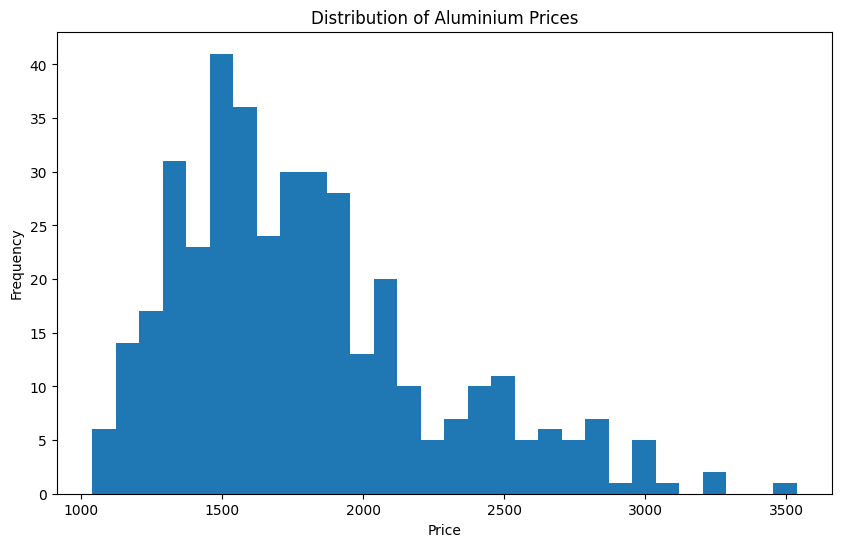

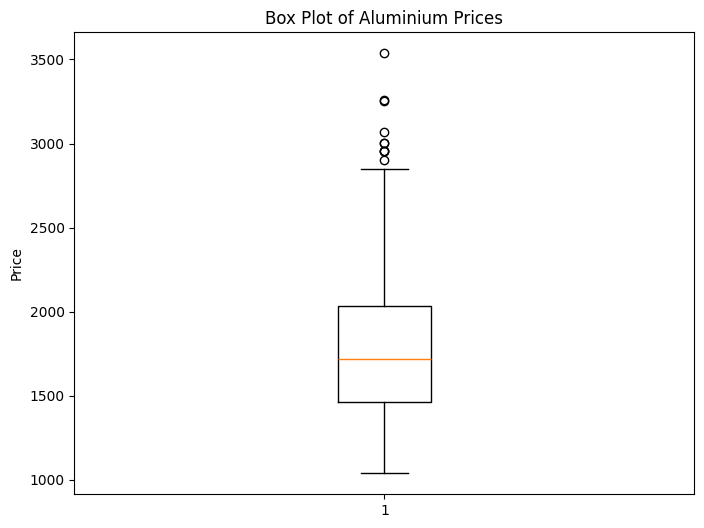

In [10]:
# Summary statistics
print(ts.describe())

# Distribution analysis
plt.figure(figsize=(10, 6))
plt.hist(ts['stock prices Al (LME)'], bins=30)
plt.title('Distribution of Aluminium Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box plot for outliers
plt.figure(figsize=(8, 6))
plt.boxplot(ts['stock prices Al (LME)'])
plt.title('Box Plot of Aluminium Prices')
plt.ylabel('Price')
plt.show()

The dataset shows an upward trend with some outlier values, indicating it may not be stationary. To confirm this, let's perform a stationarity test on the time series.

In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

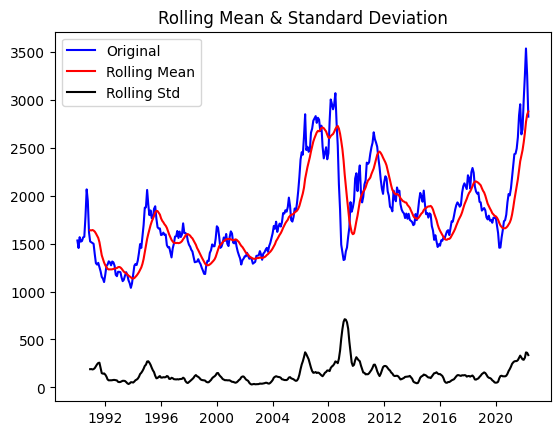

Results of Dickey-Fuller Test:
Test Statistic                  -2.678744
p-value                          0.077789
#Lags Used                       1.000000
Number of Observations Used    387.000000
Critical Value (1%)             -3.447361
Critical Value (5%)             -2.869037
Critical Value (10%)            -2.570764
dtype: float64


In [12]:
test_stationarity(ts)

The p-value exceeds 5%, so we can't confidently say that the series is stationary. This non-stationarity indicates that the data likely contains underlying trends or seasonal patterns.

This is a concern because many forecasting methods, like ARIMA models, assume stationarity to make accurate predictions, so these underlying patterns need to be addressed before applying such methods to avoid biased or unreliable forecasts.

## Forecasting

To transform the series in order to make it stationary, we’ll use differencing, which stabilizes patterns by calculating the change between observations.

Then we can divide the time series into a training set (used to do the forecast) and test set (used to compare the forecast to actual data) and go ahead with the forecasting.

After forecasting, we’ll revert the predicted values back to their original scale for accurate interpretation.

### Making the time series stationary

In [13]:
# Differencing
ts['diff_value'] = ts['stock prices Al (LME)'].diff().dropna()

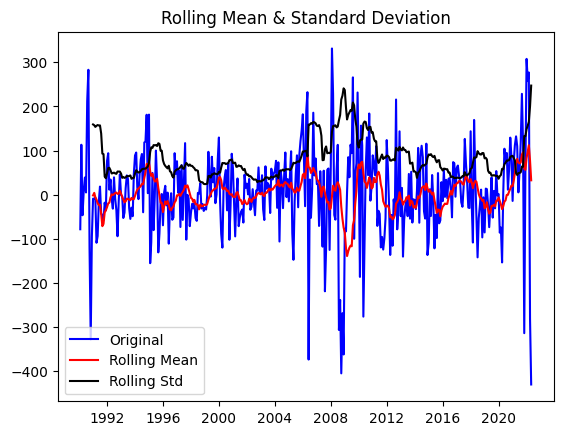

Results of Dickey-Fuller Test:
Test Statistic                -1.431200e+01
p-value                        1.180015e-26
#Lags Used                     0.000000e+00
Number of Observations Used    3.870000e+02
Critical Value (1%)           -3.447361e+00
Critical Value (5%)           -2.869037e+00
Critical Value (10%)          -2.570764e+00
dtype: float64


In [14]:
test_stationarity(ts['diff_value'].dropna())

The p-value is much lower than 5% so we can be confident that this is stationary.

In [15]:
ts.head()

,stock prices Al (LME),diff_value
1990-01-01,1533.0,NaN
1990-02-01,1454.7,-78.3
1990-03-01,1567.9,113.2
1990-04-01,1521.4,-46.5
1990-05-01,1527.4,6.0


In [16]:
# dividing the dataset
train_size = 380
ts_train = ts['diff_value'].iloc[:train_size].dropna()
ts_test = ts['diff_value'].iloc[train_size:]

### Forecasting using ARIMA

Now that we have made the Time series stationary,
we will use statistical modelling method called ARIMA.

In [17]:
from statsmodels.tsa.arima.model import ARIMA

In [18]:
!pip install pmdarima

In [19]:
# Using Autoarima to give us best model suited for the data

from pmdarima.arima import auto_arima
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
arima_model = auto_arima(ts_train, start_p = 1, d=1, start_q = 1,
                          max_p = 3, max_q = 3, max_d=2, m = 12,
                          start_P = 0, D=1, start_Q=0, max_P=2, max_D=2, max_Q=2,
                          seasonal = True,
                          trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.94 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4747.797, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4630.065, Time=0.72 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.16 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4689.988, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4559.326, Time=1.99 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=8.54 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.93 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4617.141, Time=1.32 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=4524.585, Time=1.66 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=4585.071, Time=3.16 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=6.26 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.08 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=4504.523, Time=0.77 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=4563.3

In [20]:
model = ARIMA(ts_train, order = (3,1,0)) # see previous cell
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [21]:
#fitting
fitted_diff = model_fit.fittedvalues

# Forecasting
forecast_diff = model_fit.forecast(steps=len(ts_test))

# Reversal of differentiation by cumulatively increasing predicted values
forecast_final = ts['stock prices Al (LME)'].iloc[train_size - 1] + forecast_diff.cumsum()
fitted_final = ts['stock prices Al (LME)'].iloc[0] + fitted_diff.cumsum()



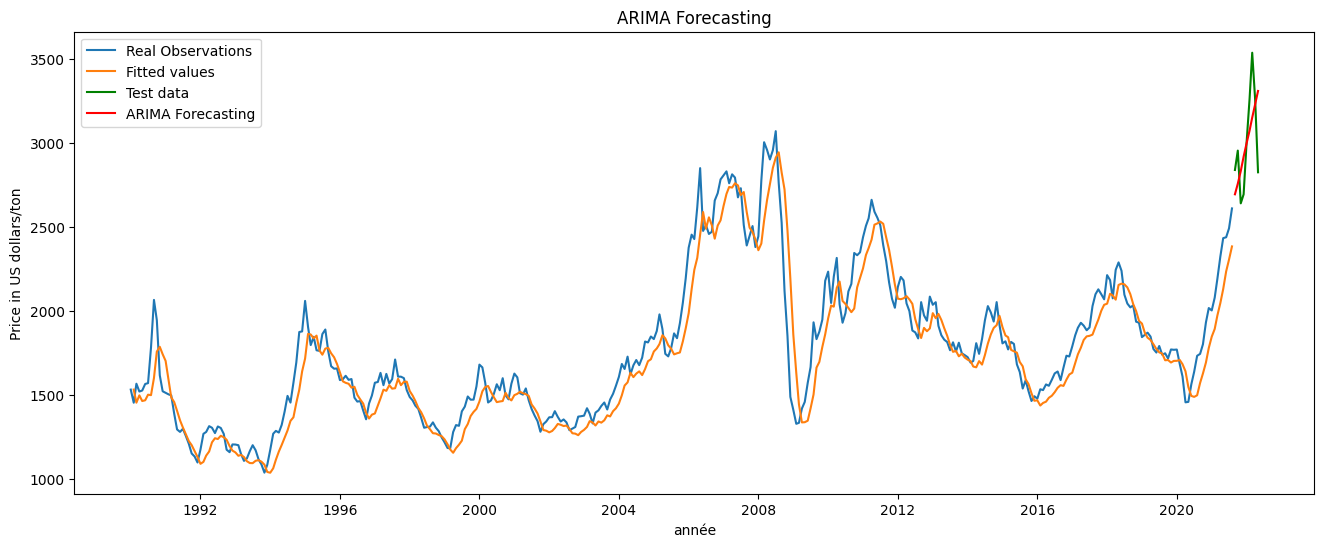

Fitting RMSE :  97.03150528618092
Forecasting RMSE :  250.58443927373796
Total RMSE :  268.714856724067


In [32]:
# Visualize the results
plt.figure(figsize=(16, 6))
plt.plot(ts['stock prices Al (LME)'][:train_size], label='Real Observations')
plt.plot(fitted_final, label='Fitted values')
plt.plot(ts['stock prices Al (LME)'][train_size:], color='green', label='Test data')
plt.plot(ts.index[train_size:], forecast_final, color='red', label='ARIMA Forecasting')
plt.xlabel('année')
plt.ylabel('Price in US dollars/ton')
plt.legend()
plt.title('ARIMA Forecasting')
plt.show()

# calculate accuracy metric
print('Fitting RMSE : ', np.sqrt(sum((fitted_final.values-ts['stock prices Al (LME)'][:train_size-1].values)**2/(train_size-1))))
print('Forecasting RMSE : ', np.sqrt(sum((forecast_final.values-ts['stock prices Al (LME)'][train_size:].values)**2/len(ts_test.values))))
print('Total RMSE : ', np.sqrt(sum((fitted_final.values-ts['stock prices Al (LME)'][:train_size-1].values)**2/(train_size-1))+ sum((forecast_final.values-ts['stock prices Al (LME)'][train_size:].values)**2/len(ts_test.values))))

The model quite fits to the data, indicating that this ARIMA model captured the historical data quite well. Now let's zoom in the forecasting part.

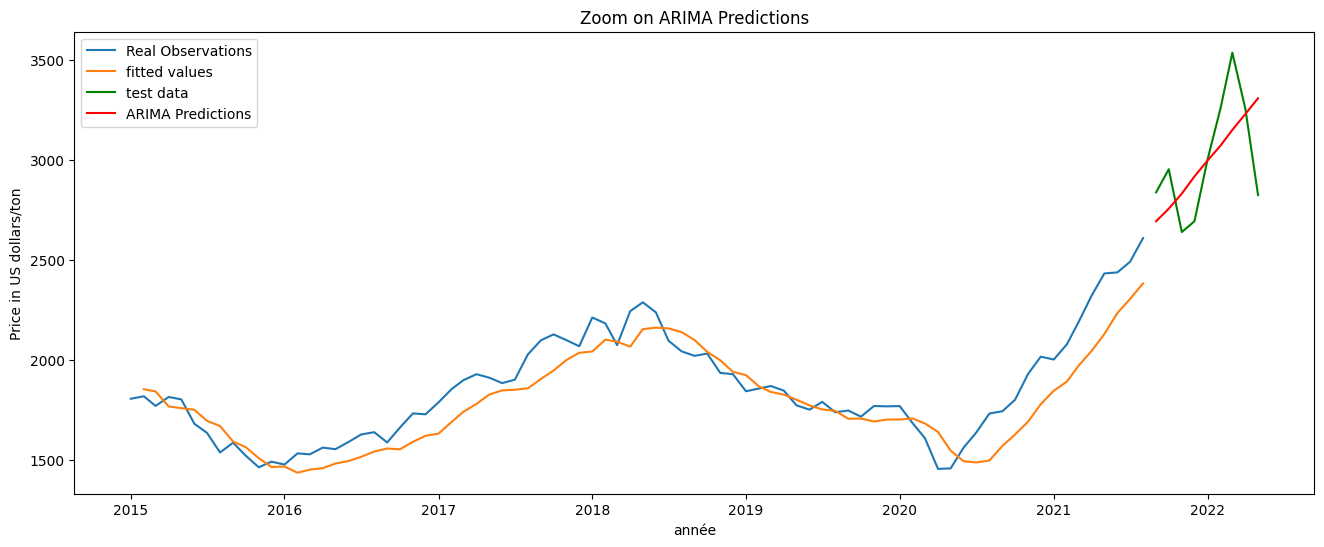

In [31]:
# zoom in
plt.figure(figsize=(16, 6))
plt.plot(ts['stock prices Al (LME)'][300:train_size], label='Real Observations')
plt.plot(fitted_final[300:], label='fitted values')
plt.plot(ts['stock prices Al (LME)'][train_size:], color='green', label='test data')
plt.plot(ts.index[train_size:], forecast_final, color='red', label='ARIMA Predictions')
plt.xlabel('année')
plt.ylabel('Price in US dollars/ton')
plt.legend()
plt.title('Zoom on ARIMA Predictions')
plt.show()

### Forecasting using exponential smoothing

While ARIMA models are powerful tools for handling time series with trend and seasonal patterns, they can become complex when tuning parameters for non-stationary data. Another approach, exponential smoothing, offers a simpler alternative for certain types of time series data by focusing directly on recent values, with older observations receiving progressively less weight.

Let's now implement Holt-Winters model, the most flexible one of the exponential smoothing tehniques, and compare its forecasting performance with the ARIMA model.

In [24]:
# holt winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [25]:
ts_train_exp = ts['stock prices Al (LME)'].iloc[:train_size].dropna()
ts_test_exp = ts['stock prices Al (LME)'].iloc[train_size:]

In [26]:
model_exp = ExponentialSmoothing(ts_train_exp, trend="mul")
model_exp_fit = model_exp.fit()

# fitting
es_fitted_values = model_exp_fit.fittedvalues

# forecast
forecast_exp = model_exp_fit.forecast(steps=len(ts_test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


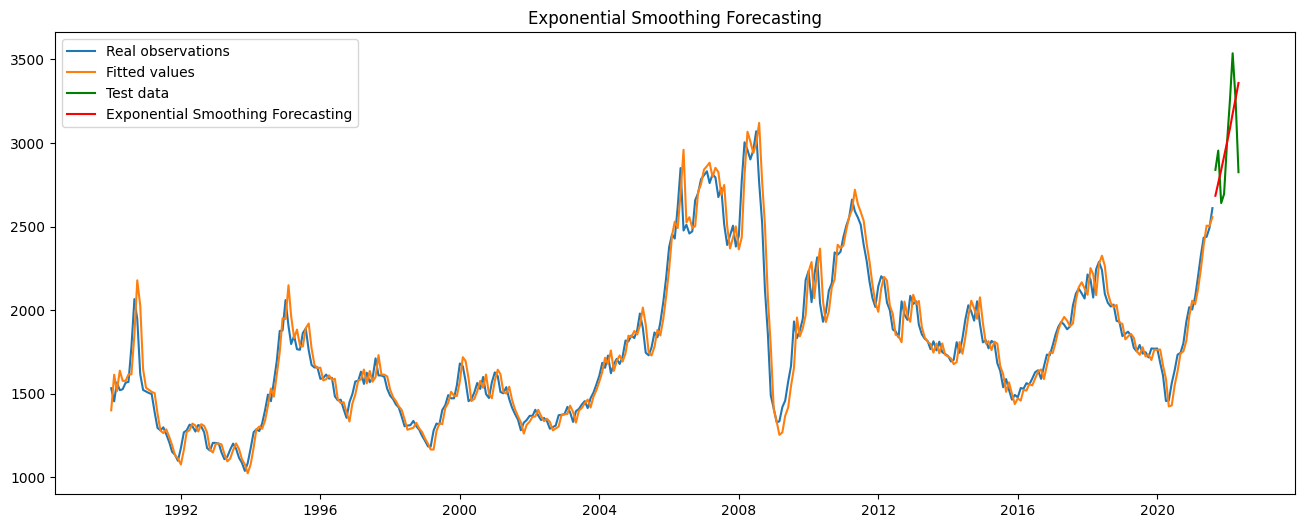

Fitting RMSE : 94.8119
Forecasting RMSE : 257.3612
Total RMSE : 274.2700


In [33]:
# Visualize the results
plt.figure(figsize=(16, 6))
plt.plot(ts['stock prices Al (LME)'][:train_size], label='Real observations')
plt.plot(es_fitted_values, label='Fitted values')
plt.plot(ts['stock prices Al (LME)'][train_size:], color='green', label='Test data')
plt.plot(ts.index[train_size:], forecast_exp, color='red', label='Exponential Smoothing Forecasting')
plt.legend()
plt.title("Exponential Smoothing Forecasting")
plt.show()

print('Fitting RMSE : %.4f' % np.sqrt(sum((es_fitted_values.values - ts['stock prices Al (LME)'][:train_size].values)**2/len(ts_train_exp))))
print('Forecasting RMSE : %.4f' % np.sqrt(sum((forecast_exp-ts_test_exp.values)**2)/len(ts_test_exp)))
print('Total RMSE : %.4f' % np.sqrt(sum((es_fitted_values.values - ts['stock prices Al (LME)'][:train_size].values)**2/len(ts_train_exp))+ sum((forecast_exp-ts_test_exp.values)**2)/len(ts_test_exp)))

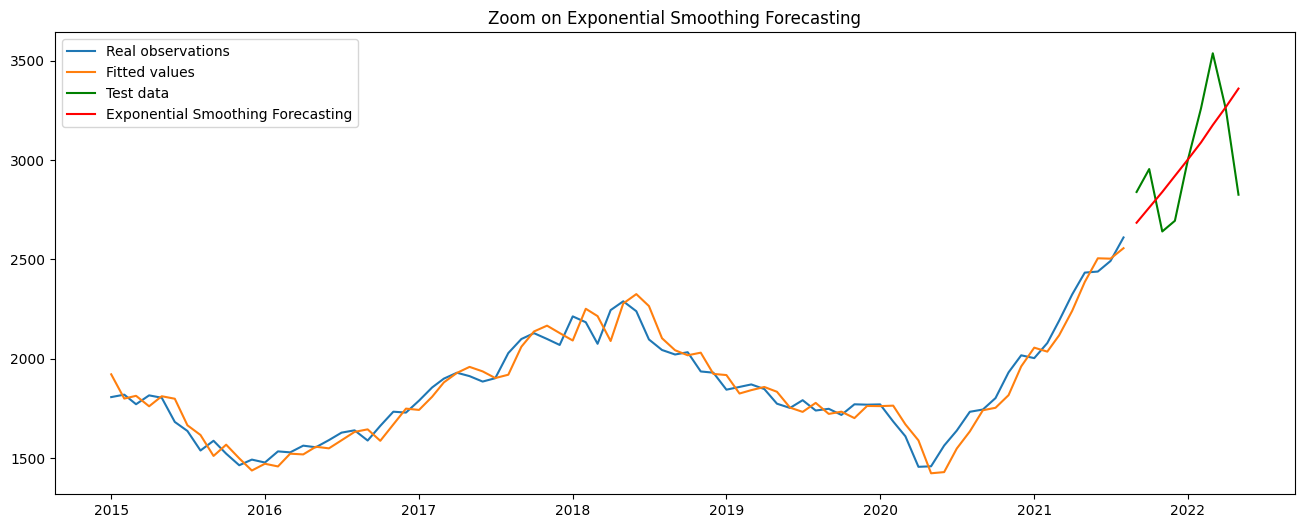

In [34]:
# zoom in
plt.figure(figsize=(16, 6))
plt.plot(ts['stock prices Al (LME)'][300:train_size], label='Real observations')
plt.plot(es_fitted_values[300:], label='Fitted values')
plt.plot(ts['stock prices Al (LME)'][train_size:], color='green', label='Test data')
plt.plot(ts.index[train_size:], forecast_exp, color='red', label='Exponential Smoothing Forecasting')
plt.legend()
plt.title("Zoom on Exponential Smoothing Forecasting")
plt.show()